🧩 **1️⃣ Importação das bibliotecas**  
Importamos bibliotecas essenciais para análise e visualização dos dados:

- **pandas** → manipulação e exploração de dados  
- **matplotlib.pyplot** e **seaborn** → visualização gráfica  
- **sqlite3** → conexão com o banco SQLite


In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Bibliotecas de análise importadas")


✅ Bibliotecas de análise importadas


🧩 **0️⃣ Preparação do banco SQLite no runtime**  
Antes de carregar os dados, garantimos que o banco SQLite criado no ETL esteja disponível no runtime atual do Colab.  

- **os.makedirs("/content/data", exist_ok=True)** → cria a pasta `/content/data` caso não exista  
- **shutil.copy(...)** → copia o arquivo `banco_vendas.db` da Drive para o runtime  
- **print()** → confirma que o banco foi copiado com sucesso  

Essa etapa é essencial para que o notebook de análise funcione independentemente do runtime, evitando erros de "arquivo não encontrado" ou `OperationalError`.


In [6]:
import shutil
import os

# Garantir que a pasta /content/data exista
os.makedirs("/content/data", exist_ok=True)

# Copiar o banco da Drive para o runtime
shutil.copy("/content/drive/MyDrive/projeto_etl/data/banco_vendas.db", "/content/data/banco_vendas.db")
print("✅ Banco copiado para o runtime atual")


✅ Banco copiado para o runtime atual


🧩 **2️⃣ Conexão e extração dos dados**  
Conectamos ao banco SQLite gerado pelo ETL e extraímos os dados da tabela `vendas`.


In [7]:
conn = sqlite3.connect("/content/data/banco_vendas.db")
df = pd.read_sql("SELECT * FROM vendas", conn)
print("✅ Dados carregados do banco")
display(df.head())


✅ Dados carregados do banco


,ID_Venda,Produto,Categoria,Cidade,Vendedor,Quantidade,Preco_Unitario,Total_Venda,Data_Venda
0,32,Boné,Acessórios,Fortaleza,Patrícia,7,153.41,1073.87,2024-10-24 00:00:00
1,6,Boné,Acessórios,Salvador,Ana,9,493.45,4441.05,2024-10-30 00:00:00
2,47,Jaqueta,Vestuário,Belo Horizonte,João,3,445.31,1335.93,2024-11-02 00:00:00
3,19,Camisa,Vestuário,Fortaleza,Patrícia,7,50.78,355.46,2024-11-04 00:00:00
4,22,Camisa,Vestuário,Rio de Janeiro,Paulo,5,287.98,1439.90,2024-11-14 00:00:00


🧩 **4️⃣ Análise exploratória de dados**  
Verificamos:  
- Número de linhas e colunas  
- Tipos de dados  
- Valores nulos  
- Estatísticas descritivas


In [8]:
# Dimensão do dataset
print(f"📊 Número de linhas e colunas: {df.shape}")

# Tipos de dados e valores nulos
display(df.info())

# Estatísticas descritivas das colunas numéricas
display(df.describe())


📊 Número de linhas e colunas: (100, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Venda        100 non-null    int64  
 1   Produto         100 non-null    object 
 2   Categoria       100 non-null    object 
 3   Cidade          100 non-null    object 
 4   Vendedor        95 non-null     object 
 5   Quantidade      100 non-null    int64  
 6   Preco_Unitario  100 non-null    float64
 7   Total_Venda     100 non-null    float64
 8   Data_Venda      100 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB


None

,ID_Venda,Quantidade,Preco_Unitario,Total_Venda
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.990000,256.487300,1592.148700
std,29.011492,2.713583,141.118588,1136.112841
min,1.000000,1.000000,-99.900000,75.610000
25%,25.750000,4.000000,149.890000,695.080000
50%,50.500000,6.000000,232.885000,1344.115000
75%,75.250000,8.000000,388.910000,2331.772500
max,100.000000,10.000000,494.910000,4673.200000


🧩 **5️⃣ Visualizações iniciais**  
Criamos gráficos para entender padrões e distribuições nos dados.


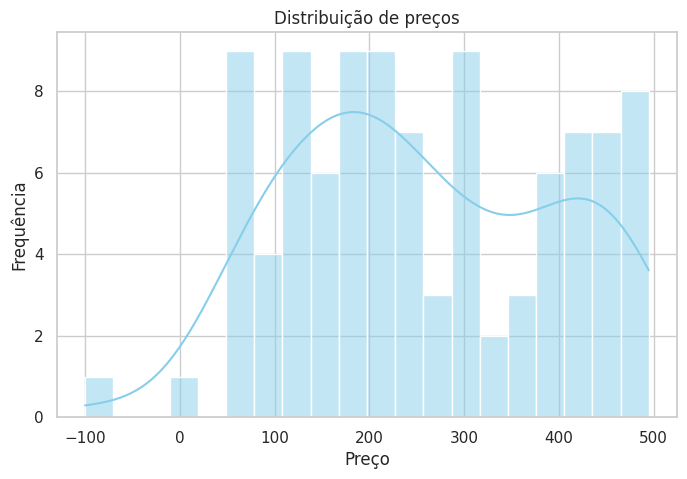

/tmp/ipython-input-338307566.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_prod.index, y=df_prod.values, palette='viridis')


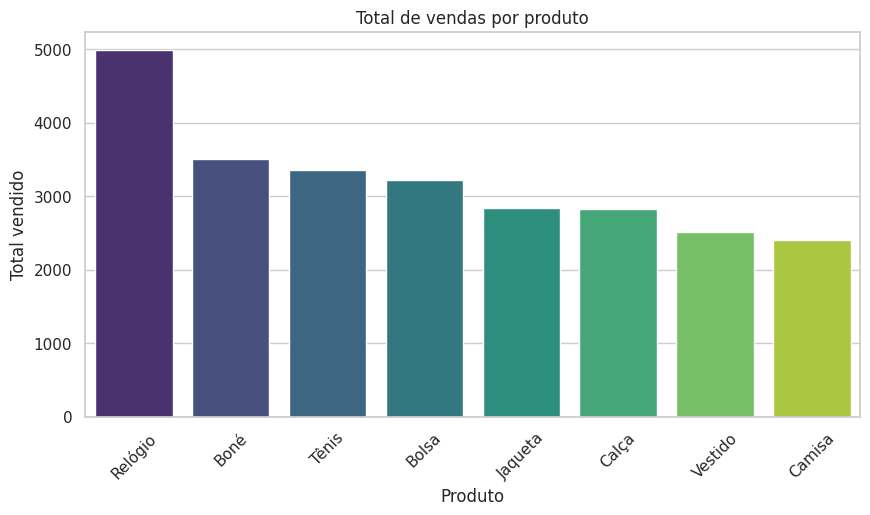

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais do seaborn
sns.set(style="whitegrid")

# 1. Distribuição de preços ou valores
if 'Preco_Unitario' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['Preco_Unitario'], kde=True, bins=20, color='skyblue')
    plt.title("Distribuição de preços")
    plt.xlabel("Preço")
    plt.ylabel("Frequência")
    plt.title("Distribuição de preços")
    plt.savefig("/content/data/distribuicao_de_preços.png", dpi=300, bbox_inches='tight') # Salvando o grafico
    plt.show()

# 2. Total de vendas por produto (se houver coluna 'produto')
if 'Produto' in df.columns:
    df_prod = df.groupby('Produto')['Preco_Unitario'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x=df_prod.index, y=df_prod.values, palette='viridis')
    plt.title("Total de vendas por produto")
    plt.xlabel("Produto")
    plt.ylabel("Total vendido")
    plt.xticks(rotation=45)
    plt.savefig("/content/data/vendas_por_produto.png", dpi=300, bbox_inches='tight')
    plt.show()


🧩 **6️⃣ Análise temporal**  
 Analisando vendas ao longo do tempo.

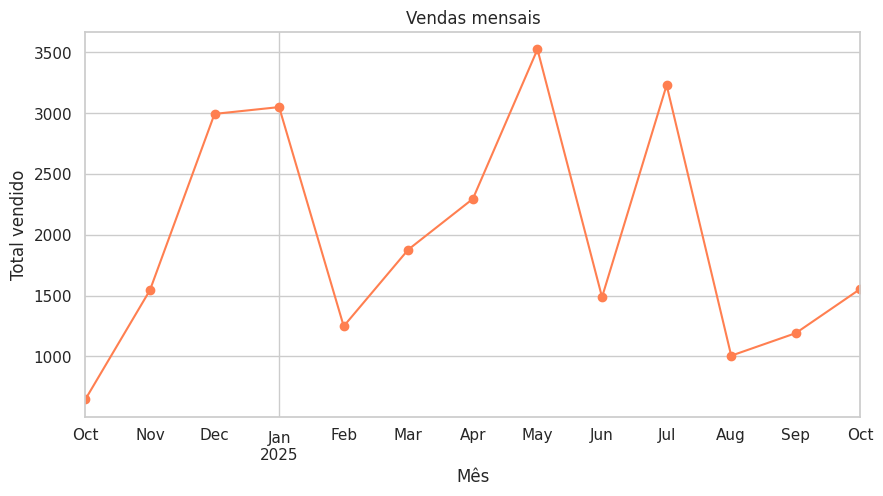

In [18]:
# Exemplo usando coluna de data
if 'Data_Venda' in df.columns:
    df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])
    vendas_por_mes = df.groupby(df['Data_Venda'].dt.to_period('M'))['Preco_Unitario'].sum()

    vendas_por_mes.plot(kind='line', figsize=(10,5), marker='o', color='coral')
    plt.title("Vendas mensais")
    plt.xlabel("Mês")
    plt.ylabel("Total vendido")
    plt.grid(True)
    plt.savefig("/content/data/vendas_mensais.png", dpi=300, bbox_inches='tight') # Salvando o grafico
    plt.show()


🧩 **7️⃣ Finalização do notebook de análise**  
O dataset foi carregado, explorado e visualizado.  



In [11]:
# Fechar conexão
conn.close()
print("✅ Conexão com o banco encerrada. Análise concluída!")


✅ Conexão com o banco encerrada. Análise concluída!
